
## **Lab Assignment One: Exploring Table Data (Diabetes Diagnoses Prediction)**

#### CS 5324: Machine Learning in Python
#### Instructor: Dr. Eric Larson
#### Serena Di Martino, Ria Mukherji, Serap Ogut, Grace Schultz


# **Business Understanding**
Diabetes is a chronic medical condition where the body can't produce or effectively respond to insulin. Often leading to health complications, its effects can reduce lifespan and quality of life. This dataset was designed to predict the likelihood of a  patient to have, or show early signs, of diabetes. It assigns numerical values to corresponding categories for each feature, which range from personal information (education, income), demographics (race, sex), and health history (drinking, smoking, mental health, physical health). Funded by the CDC, the purpose of this dataset was to identify relationships between lifestyle practices and diabetes in the US. In 2018, the CDC reported 34.2 million Americans have diabetes and an additional 88 million have prediabetes. With such large numbers, an early diagnosis can help mitigate harms and lead to effective treatment for the affected population. This data was collected during a 2015 health-related telephone survey by the Behavioral Risk Factor Surveillance System (BRFSS). Over 400,000 Americans were asked questions on health-related risk behaviors, chronic health conditions, and the use of preventative services for their children. Overall, analyzing the data can help avoid preemptive or worsening symptoms of diabetes.

The prediction task was to classify each instance, or person, as having 0- “no diabetes”, 1- “prediabetes”, or 2- “diabetes”. By predicting their diagnosis, medical professionals can identify patterns in diabetics and develop strategies for early intervention with their patients. Since there is currently no cure for diabetes, this information can be crucial to saving lives and improving the health of americans. Third parties, such as pharmaceutical companies, research institutions, and healthcare organizations, are interested in this data to develop potential treatments, use risk-management to reduce cases, make policies to provide resources, etc. In order to be useful, our prediction algorithm would need to match traditional risk assessment methods used in clinical settings. The algorithm would need to perform with high accuracy, precision, and recall that is ideally above the standard of 85-90% for reliable adoption.

===================================================================================================================



Dataset: Diabetes Health Indicators Dataset

URL: https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators


In [ ]:
# import pandas, numpy, matplotlib, and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/data.csv') # read in the csv file


df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# **Data Understanding**

## **Data Attributes**
This section focuses on analyzing the dataset's attributes. Understanding the structure and meaning of the data is a critical step in any data analysis process.



Our dataset collected a total of 21 attributes to classify each patient with their diabetes diagnosis. Specifically, the dataset has 3 numeric attributes, 5 categorical attributes, and 12 binary attributes. The numeric attributes were BMI, mental health, and physical health. BMI was calculated by dividing a person's weight by their height squared. Mental and physical health were measured by the number of days an individual reported poor health over the last month. The categorical variables were general health, age, education, and income. Numbers were assigned to each category, grouping and defining the qualitative attributes. The diabetes classification also used a categorical variable to represent their diagnosis. Many of the binary attributes referred to yes-or-no type questions, such as if the individual had high blood pressure, a stroke, or access to healthcare. However, the gender attribute also used binary numbers to distinguish between male and female.




Table below explains each attribute, its type and the description:


| Attribute            | Data Type             | Description                                                                     |
|----------------------|-----------------------|---------------------------------------------------------------------------------|
| Diabetes_012         | Categorical (Ordinal) | Indicates diabetes status (0: no diabetes, 1: prediabetes, 2: diabetes).        |
| HighBP               | Binary                | High blood pressure status (1: yes, 0: no).                                     |
| HighChol             | Binary                | High cholesterol status (1: yes, 0: no).                                        |
| CholCheck            | Binary                | Cholesterol check status (1: yes, 0: no).                                       |
| BMI                  | Numeric (Continuous)  | Body Mass Index.                                                                |
| Smoker               | Binary                | Smoking status (1: smoker, 0: non-smoker).                                      |
| Stroke               | Binary                | Stroke occurrence (1: yes, 0: no).                                              |
| HeartDiseaseorAttack | Binary                | Heart disease or heart attack history (1: yes, 0: no).                          |
| PhysActivity         | Binary                | Physical activity status (1: active, 0: inactive).                              |
| Fruits               | Binary                | Fruit consumption (1: consumes fruits, 0: does not consume fruits).             |
| Veggies              | Binary                | Vegetable consumption (1: consumes vegetables, 0: does not consume vegetables). |
| AnyHealthcare        | Binary                | Access to healthcare (1: yes, 0: no).                                           |
| NoDocbcCost          | Binary                | Unable to see a doctor due to cost (1: yes, 0: no).                             |
| GenHlth              | Categorical (Ordinal) | General health rating (1: excellent, 5: poor).                                  |
| MentHlth             | Numeric (Discrete)    | Number of poor mental health days in the past month.                            |
| PhysHlth             | Numeric (Discrete)    | Number of poor physical health days in the past month.                          |
| DiffWalk             | Binary                | Difficulty walking or climbing stairs (1: yes, 0: no).                          |
| Sex                  | Binary                | Gender (0: female, 1: male).                                                    |
| Age                  | Categorical (Ordinal) | Age group (1: 18-24, 2: 25-29, ..., 13: 80+).                                   |
| Education            | Categorical (Ordinal) | Education level (1: no education, 6: college graduate).                         |
| Income               | Categorical (Ordinal) | Income bracket (1: less than $10,000, 8: $75,000 or more).                      |



 ## **Verifying Data Quality**

To begin, our raw dataset should have 253680 instances, where each line represents a new person.

Lets verify the data is correct and try to justify the values before analyzing it any further!
We can start off by checking for any missing data using the msisingno package:




<Axes: >

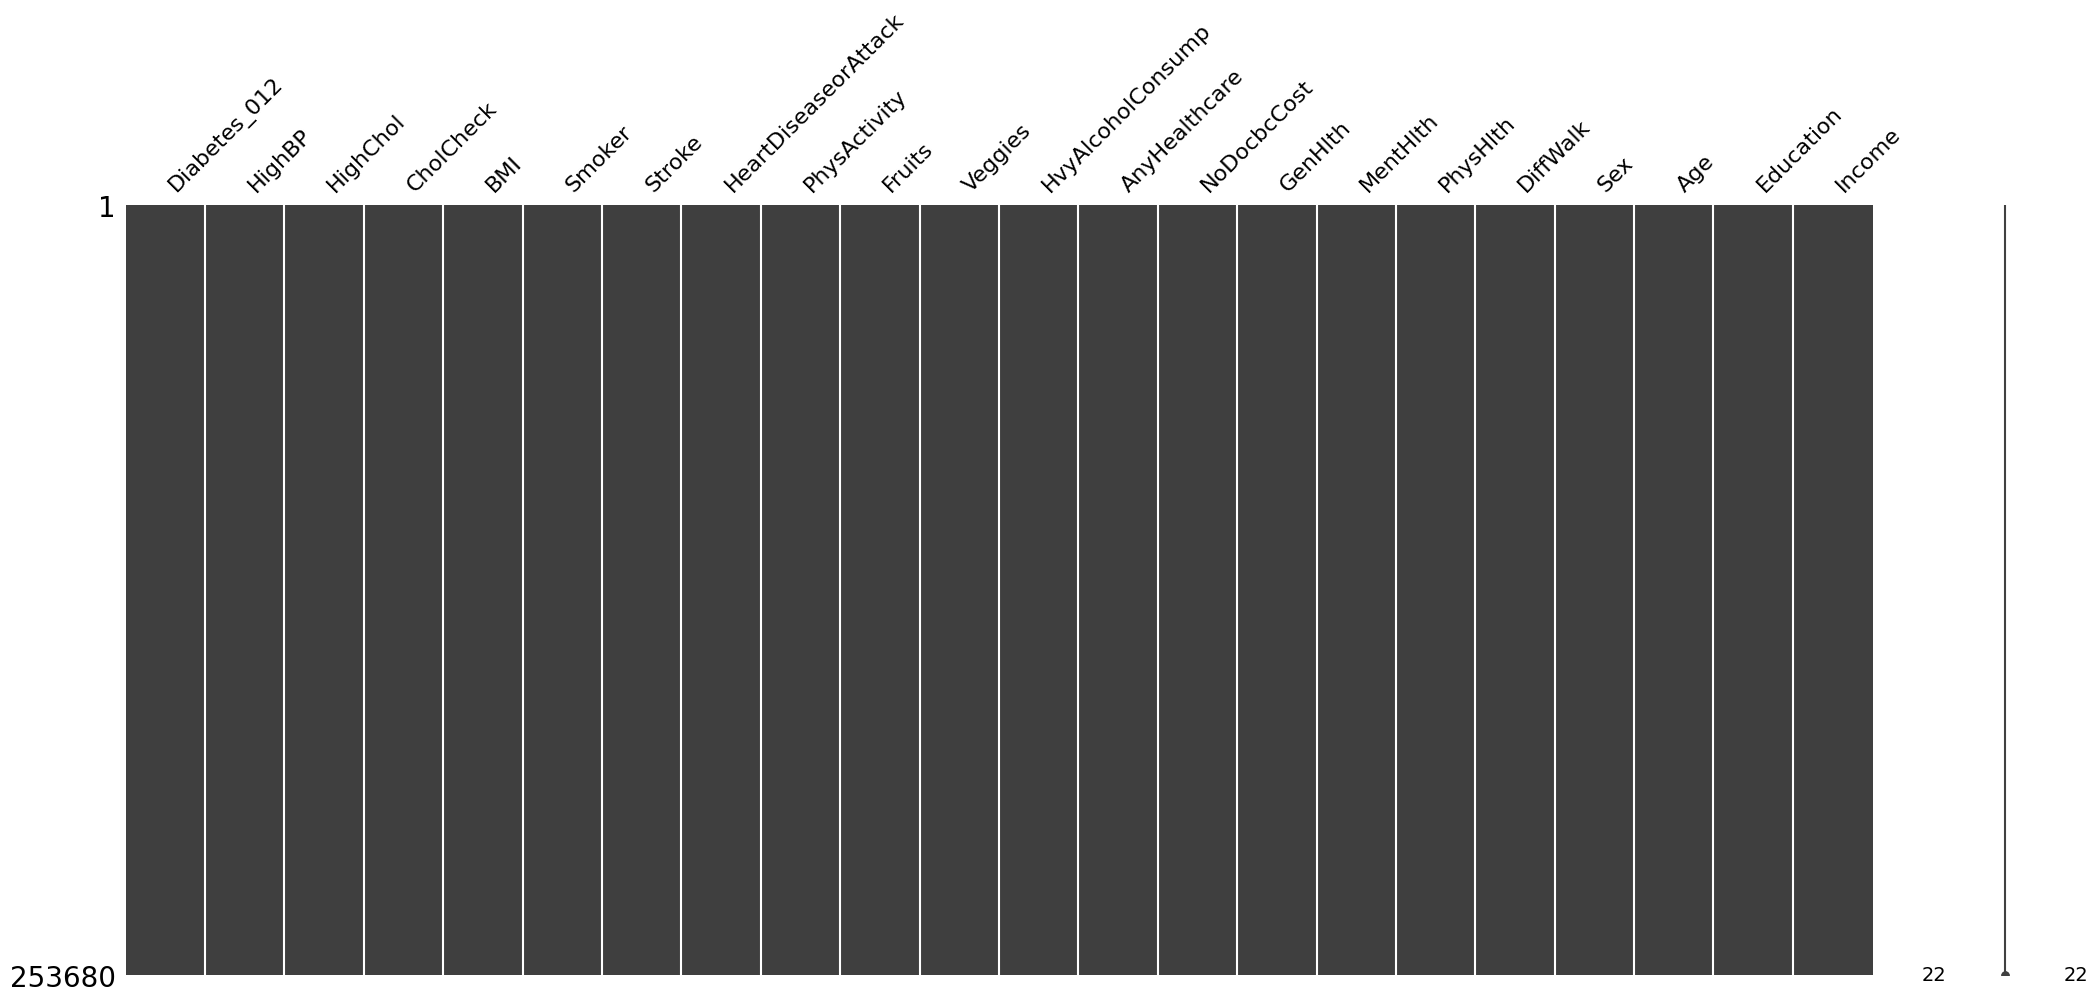

In [ ]:
# import and use visualization library called missingno that hs many types of visuals for looking at missing data
import missingno as msno
msno.matrix(df)


Although we don't see any missing data, lets double check by printing out the length of the dataset and then comparing it to the data summary using the describe method

In [ ]:

#print the length of the dataset
print(len(df))


253680


In [ ]:
# find the data summary
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Looking at the data statistics printed out from above, we can confirm that there are no missing values since every column does contain all 253680 values.

 Moving forward, we should check for data that may have been entered incorrectly. We can do this by making sure the data all fits within the acceptable ranges.


In [ ]:
# Define plausible ranges for key variables
# Continuous variables should fall within realistic medical ranges
plausible_checks = {
    'BMI': (10, 60),  # Typical BMI range, extreme cases flagged
    'Age': (1, 13),  # Age is categorized from 1 (18-24) to 13 (80+)
    'MentHlth': (0, 30),  # Number of days of poor mental health in the last 30 days
    'PhysHlth': (0, 30),  # Number of days of poor physical health in the last 30 days
    'GenHlth': (1, 5),  # General health: 1 (excellent) to 5 (poor)
    'Income': (1, 8),  # Income levels from 1 (lowest) to 8 (highest)
    'Education': (1, 6),  # Education levels from 1 (no school) to 6 (college graduate)
    'Diabetes_012': (0, 2),  # Target variable: 0 (no diabetes), 1 (pre-diabetes), 2 (diabetes)
    'HighBP': (0, 1),  # Categorical: 0 (no high BP), 1 (high BP)
    'HighChol': (0, 1),  # Categorical: 0 (no high cholesterol), 1 (high cholesterol)
    'CholCheck': (0, 1),  # Categorical: 0 (no), 1 (yes)
    'Smoker': (0, 1),  # Categorical: 0 (no), 1 (yes)
    'Stroke': (0, 1),  # Categorical: 0 (no), 1 (yes)
    'HeartDiseaseorAttack': (0, 1),  # Categorical: 0 (no), 1 (yes)
    'PhysActivity': (0, 1),  # Categorical: 0 (no), 1 (yes)
    'Fruits': (0, 1),  # Categorical: 0 (no), 1 (yes)
    'Veggies': (0, 1),  # Categorical: 0 (no), 1 (yes)
    'HvyAlcoholConsump': (0, 1),  # Categorical: 0 (no), 1 (yes)
    'AnyHealthcare': (0, 1),  # Categorical: 0 (no), 1 (yes)
    'NoDocbcCost': (0, 1),  # Categorical: 0 (no), 1 (yes)
    'DiffWalk': (0, 1),  # Categorical: 0 (no), 1 (yes)
    'Sex': (0, 1)  # Categorical: 0 (female), 1 (male)
}

# Function to check if values are within plausible ranges
def check_plausibility(df, plausible_checks):
    for column, (min_val, max_val) in plausible_checks.items():
        invalid_entries = df[(df[column] < min_val) | (df[column] > max_val)]
        if not invalid_entries.empty:
            print(f"Column '{column}' has {len(invalid_entries)} invalid entries.")
        else:
            print(f"Column '{column}' is within the plausible range.")

# Run the plausibility checks
check_plausibility(df, plausible_checks)


Column 'BMI' has 805 invalid entries.
Column 'Age' is within the plausible range.
Column 'MentHlth' is within the plausible range.
Column 'PhysHlth' is within the plausible range.
Column 'GenHlth' is within the plausible range.
Column 'Income' is within the plausible range.
Column 'Education' is within the plausible range.
Column 'Diabetes_012' is within the plausible range.
Column 'HighBP' is within the plausible range.
Column 'HighChol' is within the plausible range.
Column 'CholCheck' is within the plausible range.
Column 'Smoker' is within the plausible range.
Column 'Stroke' is within the plausible range.
Column 'HeartDiseaseorAttack' is within the plausible range.
Column 'PhysActivity' is within the plausible range.
Column 'Fruits' is within the plausible range.
Column 'Veggies' is within the plausible range.
Column 'HvyAlcoholConsump' is within the plausible range.
Column 'AnyHealthcare' is within the plausible range.
Column 'NoDocbcCost' is within the plausible range.
Column 'D

As we can see above, every category, with the exception of BMI is within a reasonable range.

 Although we may be suspicious of BMI and think of removing some of the outliers, lets print the highest and lowest values since high BMI's may be more common in people with diabetes:

In [ ]:
min_bmi = df['BMI'].min()
max_bmi = df['BMI'].max()
print(f"The minimum BMI value in the dataset is: {min_bmi}")
print(f"The maximum BMI value in the dataset is: {max_bmi}\n")

The minimum BMI value in the dataset is: 12.0
The maximum BMI value in the dataset is: 98.0



Since none of the values are negative, and it could be possible for someone to have a BMI of 98 we will not remove any of the entries. Looking back at the statistics from earlier BMI, Mental Health, and Physical Health all seem to have a high standard deviation, but since we have determined that they are within an acceptable range, we will do a deeper dive on that section of the data later.

Our final step in verifying the data will be to check for duplicates:

In [ ]:


# Check for duplicated rows
duplicate_rows = df.duplicated()

# Print the number of duplicated rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# # Optionally, display the duplicated rows
# print("Duplicated rows:")
# print(df[duplicate_rows])


Number of duplicate rows: 23899


Before simply removing the suspected duplicate data, we wanted to consider the possibility that the duplicates were actually two seperate patients who happened to have the same stats across all 22 categories, or whether they were true duplicates.

NOTE: The data description promised a patient ID, however it appears to have been removed, so we can not verify unique entries that way. To verify uniqueness so we did a probability analysis as described below:


The probability of two different patients having identical values across all 22 features in the dataset can be estimated by calculating the likelihood of matching on each feature individually, then multiplying these probabilities. For instance, features like Sex are binary with a 50% chance of matching, while others like BMI or Physical Health have a larger number of possible values, making matches less likely. If we assume each feature has around 30 possible values, the probability of two individuals matching by chance on all 22 features is approximately
(
1
/
30
)
22
(1/30)
22
 , which is an extremely small number (~
7.5
×
1
0
−
33
7.5×10
−33
 ). This means that it's highly improbable that two different people will have identical stats across all 22 categories. This would mean that the identical rows we observed are likely true duplicates rather than coincidental identical entries by unique individuals.

This calculation assumes independence among the features and evenly distributed values, which simplifies the scenario and probably does not reflect real-world complexities. Even without the assumptions however, we can say that these repeat values are likely from duplication. Duplicated data could be a result of multiple server entries or other similar errors.

Further adding to our conclusion, since the duplicates are around 9% of the data, (23899/253680)x100, it is EXTREMELY unlikely that most of the entries are not duplicates. 9% is a lot of data, and leaving it in will skew the rest of our data. Therefore we find it reasonable to drop the suspected duplicates.

In [ ]:

# Remove duplicated rows
df = df.drop_duplicates()

# Verify the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {len(df)}")


Number of rows after removing duplicates: 229781


We are now done verifying and cleaning our data and can move on to some visualizations!

# **Data Visualization**

## **Basic Feature Distribution**


<!--
For the basic feature visualization, we chose to use a normalized bar plot to illustrate the relationship between age groups, diabetes status, and gender. This plot effectively highlights the distribution of diabetes across different age categories while normalizing the data to show proportions rather than raw counts. We chose to normalize because with normalization we can easily compare the prevalence of diabetes across age groups, regardless of the total number of individuals in each group.

We decided that using this plot is ideal for basic feature exploration because it allows for easy interpretation of both the proportion and the actual count of individuals in each group. It also clarifies the age-related trends in diabetes. -->

## Visualization 1,2, & 3: Box Plots of BMI, Mental Health, and Physical Health

 Visualize basic feature distributions. That is, plot the dynamic range and exploratory distribution plots (like boxplots, histograms, kernel density estimation) to better understand the data. Describe anything meaningful or potentially useful you discover from these visualizations. These may also help to understand what data is missing or needs imputation. Note: You can also use data from other sources to bolster visualizations. Visualize at least five plots, at least one categorical.


To view some of the basic feature distributions, we wanted to start with viewing the distribution of the aformentioned suspicous BMI, Mental Health, and Physical health categories since they seem to have a high standard deviation (see verifying data quality section.) We decided to vizualize the data using boxplots:

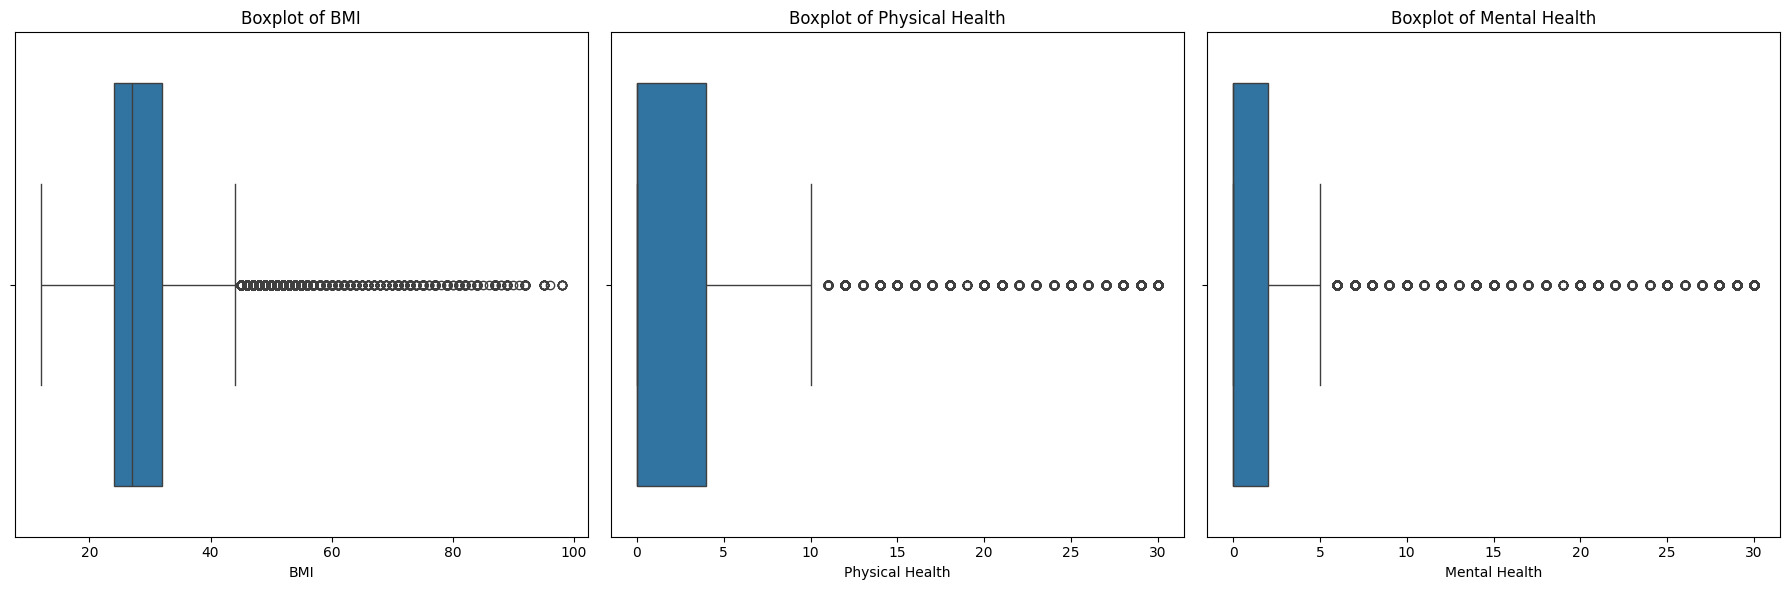

--- BMI ---
The lower bound for BMI outliers is: 12.0
The upper bound for BMI outliers is: 44.0
The number of outliers detected in the BMI column: 5638
The minimum BMI value in the dataset is: 12.0
The maximum BMI value in the dataset is: 98.0

--- Physical Health ---
The upper bound for Physical Health outliers is: 10.0
The number of outliers detected in the Physical Health column: 34347
The minimum Physical Health value in the dataset is: 0.0
The maximum Physical Health value in the dataset is: 30.0

--- Mental Health ---
The upper bound for Mental Health outliers is: 5.0
The number of outliers detected in the Mental Health column: 36163
The minimum Mental Health value in the dataset is: 0.0
The maximum Mental Health value in the dataset is: 30.0


In [ ]:
# Set up the figure with 3 subplots for BMI, Physical Health, and Mental Health
plt.figure(figsize=(18, 6))

# Boxplot for BMI
plt.subplot(1, 3, 1)
sns.boxplot(x=df['BMI'])
plt.title('Boxplot of BMI')
plt.xlabel('BMI')

# Boxplot for Physical Health (PhysHlth)
plt.subplot(1, 3, 2)
sns.boxplot(x=df['PhysHlth'])
plt.title('Boxplot of Physical Health')
plt.xlabel('Physical Health')

# Boxplot for Mental Health (MentHlth)
plt.subplot(1, 3, 3)
sns.boxplot(x=df['MentHlth'])
plt.title('Boxplot of Mental Health')
plt.xlabel('Mental Health')

plt.tight_layout()
plt.show()
# Calculating outliers for BMI, Physical Health, and Mental Health using IQR method

# For BMI
Q1_bmi = df['BMI'].quantile(0.25)
Q3_bmi = df['BMI'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi
lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi
outliers_bmi = df[(df['BMI'] < lower_bound_bmi) | (df['BMI'] > upper_bound_bmi)]
min_bmi = df['BMI'].min()
max_bmi = df['BMI'].max()

# For Physical Health (PhysHlth)
Q1_phys = df['PhysHlth'].quantile(0.25)
Q3_phys = df['PhysHlth'].quantile(0.75)
IQR_phys = Q3_phys - Q1_phys
lower_bound_phys = Q1_phys - 1.5 * IQR_phys
upper_bound_phys = Q3_phys + 1.5 * IQR_phys
outliers_phys = df[(df['PhysHlth'] < lower_bound_phys) | (df['PhysHlth'] > upper_bound_phys)]
min_phys = df['PhysHlth'].min()
max_phys = df['PhysHlth'].max()

# For Mental Health (MentHlth)
Q1_ment = df['MentHlth'].quantile(0.25)
Q3_ment = df['MentHlth'].quantile(0.75)
IQR_ment = Q3_ment - Q1_ment
lower_bound_ment = Q1_ment - 1.5 * IQR_ment
upper_bound_ment = Q3_ment + 1.5 * IQR_ment
outliers_ment = df[(df['MentHlth'] < lower_bound_ment) | (df['MentHlth'] > upper_bound_ment)]
min_ment = df['MentHlth'].min()
max_ment = df['MentHlth'].max()

# Printing the results
print(f"--- BMI ---")
print(f"The lower bound for BMI outliers is: {lower_bound_bmi}")
print(f"The upper bound for BMI outliers is: {upper_bound_bmi}")
print(f"The number of outliers detected in the BMI column: {outliers_bmi.shape[0]}")
print(f"The minimum BMI value in the dataset is: {min_bmi}")
print(f"The maximum BMI value in the dataset is: {max_bmi}\n")

print(f"--- Physical Health ---")
#print(f"The lower bound for Physical Health outliers is: {lower_bound_phys}")
print(f"The upper bound for Physical Health outliers is: {upper_bound_phys}")
print(f"The number of outliers detected in the Physical Health column: {outliers_phys.shape[0]}")
print(f"The minimum Physical Health value in the dataset is: {min_phys}")
print(f"The maximum Physical Health value in the dataset is: {max_phys}\n")

print(f"--- Mental Health ---")
#print(f"The lower bound for Mental Health outliers is: {lower_bound_ment}")
print(f"The upper bound for Mental Health outliers is: {upper_bound_ment}")
print(f"The number of outliers detected in the Mental Health column: {outliers_ment.shape[0]}")
print(f"The minimum Mental Health value in the dataset is: {min_ment}")
print(f"The maximum Mental Health value in the dataset is: {max_ment}")


We can clearly see some interesting features about the data above:(Note:Boxplots for Physical and Mental Health are missing what appears to be the left side of the boxplot because it is unreasonable to extend whiskers below 0 according to the scale of acceptable responses)

First off, the data in all three graphs are skewed right.

For BMI this means that most people are within the box range, but there are plenty of outliers who are on the higher end of the spectrem.

For Mental and Physical health, the vast majority of people have very few bad days, with a countable number of exceptions who have a higher number of bad days. It is important to remember that this data is self reported, and most people don't necessarily track their days, so this data is more open to interpretation.

For BMI the Median of the inner box seems more centered, but the center is on the higher end of the healthy BMI range which
is supposedly between 18.5 and 24.9. This means that more than 50% of people surveyed had BMI higher than 24.9.

This data may be skewed by the fact that there are plenty more people in this study who do not have diabetes than people who do, so we can seperate the BMI distributions between people who do and don't have diabetes using a violin plot:

Note: We wanted to find out more information about mental and physical health, and diabetes correlation. See additional questions!

## Visualization 4: BMI Violin Plots

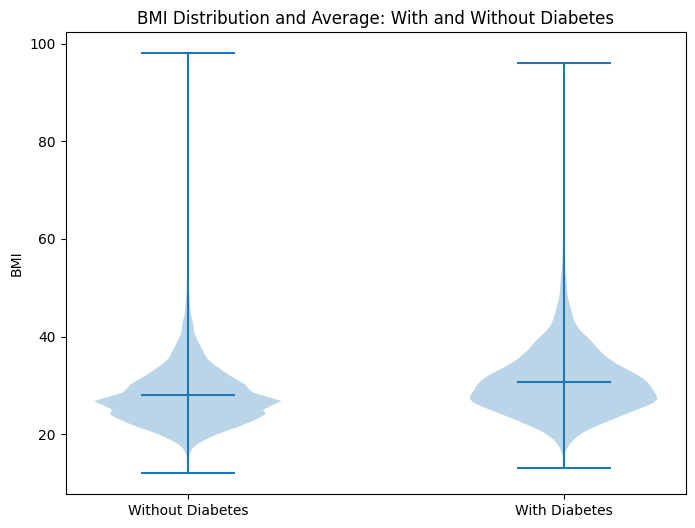

In [ ]:
# Separate the data into two groups: with diabetes (1) and without diabetes (0)
df_with_diabetes = df[df['Diabetes_012'] == 1]
df_without_diabetes = df[df['Diabetes_012'] == 0]

# Create a violin plot to compare the distribution and average BMI for individuals with and without diabetes
plt.figure(figsize=(8, 6))

# Combine the data for the plot
data = [df_without_diabetes['BMI'], df_with_diabetes['BMI']]
categories = ['Without Diabetes', 'With Diabetes']

# Create the violin plot
plt.violinplot(data, showmeans=True)

# Set labels and title
plt.xticks([1, 2], categories)
plt.title('BMI Distribution and Average: With and Without Diabetes')
plt.ylabel('BMI')

plt.show()


The violin plots above highlight the difference between the two groups. People without diabetes tend to have a more balanced and symmetric BMI distribution, with most values falling in the healthy to slightly overweight range.

On the other hand, the distribution of people with diabetes has a higher concentration of elevated BMIs, many of which fall in the overweight and obese categories. The mean BMI for people with diabetes is also higher, highlighting the correlation.

This opened up some questions :

## Visualization 5: Age and Gender in Diabetes Bar Chart

<Figure size 1000x600 with 0 Axes>

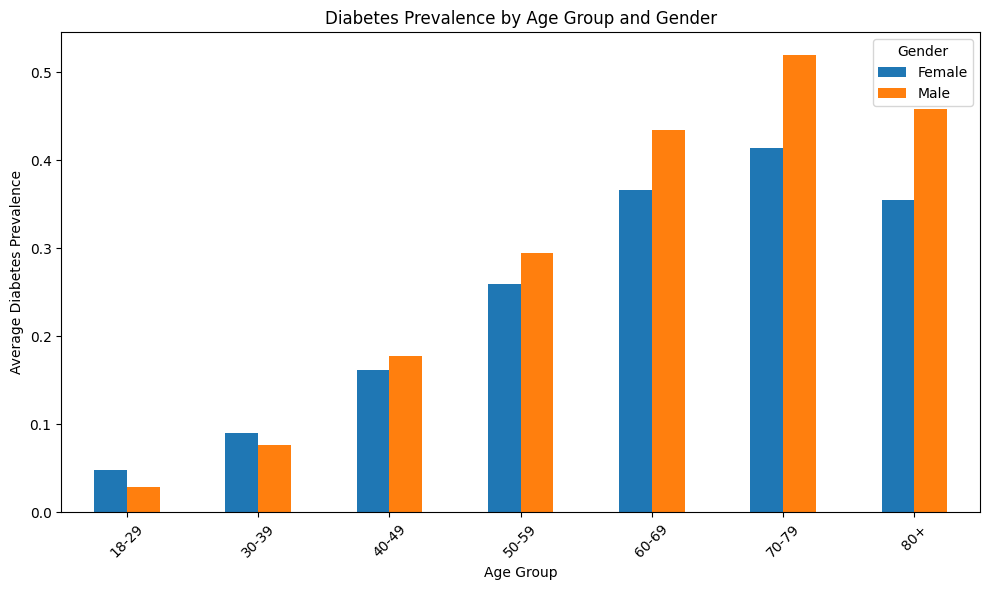

In [ ]:
# Mapping the encoded "Age" values to actual age ranges
df_age_gender = df.copy()
age_mapping = {
    1: 18, 2: 25, 3: 30, 4: 35, 5: 40, 6: 45, 7: 50,
    8: 55, 9: 60, 10: 65, 11: 70, 12: 75, 13: 80
}
df_age_gender['Age'] = df_age_gender['Age'].map(age_mapping)

# Now we can group the ages again into bins and plot diabetes prevalence by gender
bins = [18, 29, 39, 49, 59, 69, 79, 89]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df_age_gender['AgeGroup'] = pd.cut(df_age_gender['Age'], bins=bins, labels=labels, right=False)

# Recreate the pivot table for diabetes  by age group and gender
diabetes_by_age_gender = df_age_gender.pivot_table(index='AgeGroup', columns='Sex', values='Diabetes_012', aggfunc='mean')

# Plotting the diabetes concentration by age group and gender
plt.figure(figsize=(10, 6))
diabetes_by_age_gender.plot(kind='bar', figsize=(10, 6))
plt.title('Diabetes Prevalence by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Diabetes Prevalence')
plt.xticks(rotation=45)
plt.legend(['Female', 'Male'], title="Gender")
plt.tight_layout()
plt.show()


We decided to do a barchart split describing the concentration of people with diabetes by gender and age group. Although it is somewhat expected that a higher percentage of people are diagnosed with diabetes as they get older (likely due to a lack of movement with aging,) something very unexpected is that men tend to be diagnosed with diabetes at a higher rate than women. This is super interesting because men tend to be diagnosed with diabetes at a much higher rate for women which is unexpected.

Upon research, we found that men actually develop diabes at a lower weight than women, because they tend to carry more viceral fat: https://www.cdc.gov/diabetes/risk-factors/diabetes-and-men.html#:~:text=Men%20are%20more%20likely%20to,these%20problems%20are%20often%20treatable.

We thought this was really interesting!

(Note: This chart is calculated by 100% women with diabetes and 100% men with diabetes and then takes a percentage of what age group they are in. If you add up all the columns for either men or women it should equal 1 exactly. This is a way of normalizing the data for easier viewing)

### Visualization 6 & 7: Diabetes by Age Group KDE and Bar Chart
A deeper look at the actual percentages in age related diabetes:

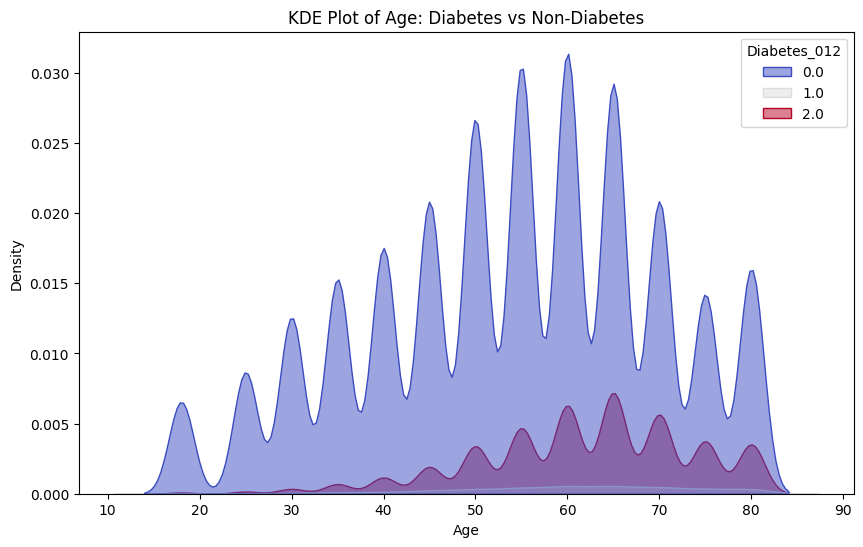

In [ ]:
# Let's create a KDE plot for Age, comparing individuals with and without diabetes.

df_diabetesStatus_by_age = df.copy()

age_mapping = {
    1: 18, 2: 25, 3: 30, 4: 35, 5: 40, 6: 45, 7: 50,
    8: 55, 9: 60, 10: 65, 11: 70, 12: 75, 13: 80
}
df_diabetesStatus_by_age['Age'] = df_diabetesStatus_by_age['Age'].map(age_mapping)

# Now we can group the ages again into bins and plot diabetes by gender
bins = [18, 29, 39, 49, 59, 69, 79, 89]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df_diabetesStatus_by_age['AgeGroup'] = pd.cut(df_diabetesStatus_by_age['Age'], bins=bins, labels=labels, right=False)


plt.figure(figsize=(10, 6))

# KDE plot for Age, separated by diabetes status
sns.kdeplot(x='Age', hue='Diabetes_012', data=df_diabetesStatus_by_age, fill=True, palette='coolwarm', alpha=0.5)

# Adding labels and title
plt.title('KDE Plot of Age: Diabetes vs Non-Diabetes')
plt.xlabel('Age')
plt.ylabel('Density')

plt.show()


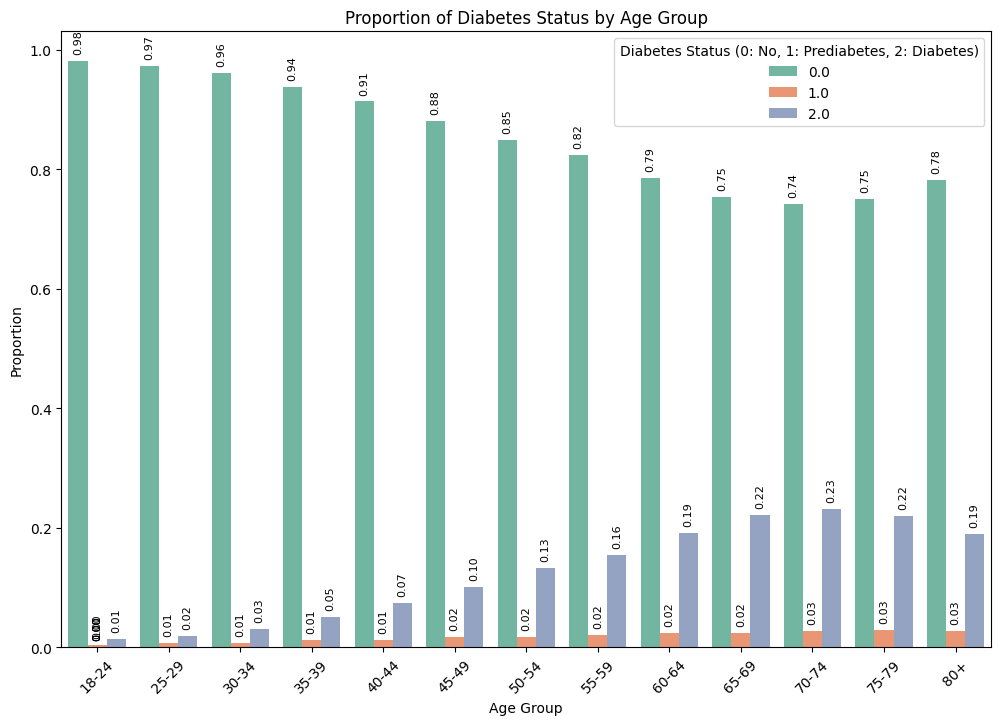

In [ ]:

# Making a copy of the dataframe
df_diabetes_status = df.copy()

# Create the age mapping
age_mapping = {
    1: '18-24',
    2: '25-29',
    3: '30-34',
    4: '35-39',
    5: '40-44',
    6: '45-49',
    7: '50-54',
    8: '55-59',
    9: '60-64',
    10: '65-69',
    11: '70-74',
    12: '75-79',
    13: '80+'
}

# Map the Age column to categorical values
df_diabetes_status['Age'] = df_diabetes_status['Age'].map(age_mapping)

# Define the age order
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49',
             '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

# Group the data by Age and Diabetes_012
df_grouped = df_diabetes_status.groupby(['Age', 'Diabetes_012']).size().reset_index(name='Count')
df_grouped['Proportion'] = df_grouped.groupby('Age')['Count'].transform(lambda x: x / x.sum())

# Plot the data
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Age', y='Proportion', hue='Diabetes_012', data=df_grouped, order=age_order, palette='Set2')

# Add labels and title
plt.title('Proportion of Diabetes Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Diabetes Status (0: No, 1: Prediabetes, 2: Diabetes)')

# Annotate the bars with values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8, color='black', rotation=90, xytext=(0, 5),
                textcoords='offset points')

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()




In the above visualization, we observe a clear trend where the percentage of diabetes increases as individuals grow older. This pattern suggests that age is a significant factor contributing to the likelihood of developing diabetes. The upward trend may be attributed to various age-related factors such as changes in metabolism, increased risk of obesity, and long-term lifestyle habits.

## Visualization 8: Violin Plot of Education and Diabetes

<ipython-input-16-70062d70c2a8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Education', y='Diabetes_012', data=df, palette='coolwarm')


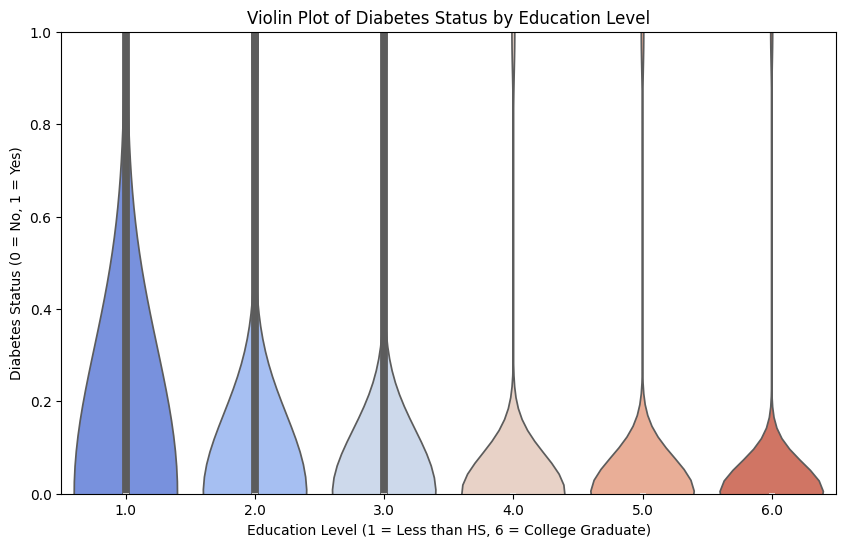

In [ ]:

# Set up the plot size
plt.figure(figsize=(10, 6))

# Create a violin plot with Education on the x-axis and Diabetes status on the y-axis
sns.violinplot(x='Education', y='Diabetes_012', data=df, palette='coolwarm')

# Add labels and title
plt.title('Violin Plot of Diabetes Status by Education Level')
plt.xlabel('Education Level (1 = Less than HS, 6 = College Graduate)')
plt.ylabel('Diabetes Status (0 = No, 1 = Yes)')

# Limit the y-axis to the binary range for Diabetes Status (0 and 1)
plt.ylim(0, 1)

# Display the plot
plt.show()


This plot is incredibly interesting because who would have guessed that there is a corelation between education and Diabetes? It doesn't seem that intuitve, but the plot clearly shows an extremely strong correlation between low education levels and Diabetes. With each increasing level of education the percentage of people diagnosed with diabetes gets smaller and smaller!

We felt the need to look into the reasonings further! (See)

## **Analyzing Questions**




## Why did education have such a strong effect on diabetes diagnoses?

As aformentioned, we found it really surprising how closely correlated Diabetes was with education level, and wondered if it could be related to income.

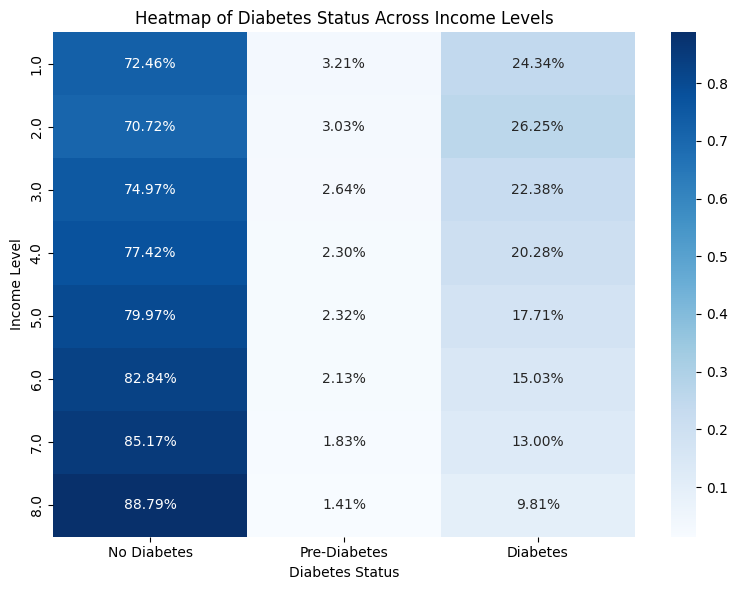

In [ ]:
# Create a crosstab of Diabetes_012 and Income for heatmap
diabetes_income_crosstab = pd.crosstab(df['Income'], df['Diabetes_012'], normalize='index')

# Plotting a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(diabetes_income_crosstab, annot=True, cmap='Blues', fmt=".2%", cbar=True)

plt.title('Heatmap of Diabetes Status Across Income Levels')
plt.xlabel('Diabetes Status')
plt.ylabel('Income Level')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['No Diabetes', 'Pre-Diabetes', 'Diabetes'])
plt.tight_layout()
plt.show()
#do fruits and veggies correlation with this

This heatmap offers valuable insight into the relationship between levels of income and diabeties status (No Diabetes, Pre-Diabetes, and Diabetes).

First, lets analyze the **No Diabetes** status coloumn. We observe that the majority of individuals in this data set do not have diabetes, indicated by the high percentages. Furthermore, we can see that the higher the income level, the greater the proportion of individuals without diabetes. The percentages in this column range from 88.79% for the highest income group to 72.46% for the lowest, clearly suggesting that individuals with higher incomes are less likely to have diabetes.

Now, lets move on to the middle column to analyze the **Pre-Diabetes** statistics. The percentages here range from 1.41% at the highest income level to 3.21% at the lowest. This indicates that as income decreases, the proportion of individuals with pre-diabetes increases slightly. Although the variation is smaller compared to the other categories, it still highlights a notable trend linking lower income levels to a higher risk of pre-diabetes.

Finally, lets analyze the **Diabetes** column. The percentage of individuals with diabetes ranges from 9.81% in the highest income bracket to 24.34% in the lowest. This shows that people with lower income levels are significantly more likely to have diabetes, reinforcing the pattern seen in the other columns.

Overall, the heatmap reveals a strong correlation between higher income levels and a lower likelihood of both Pre-diabetes and Diabetes. It is also notable that lower income groups are more likely to suffer from these conditions, with the differences being particularly pronounced for full diabetes cases.

## Why are high income people less likely to have diabetes?
We were surprised by the stark difference between income level and diabetes diagnoses, but we wanted to dig deeper and find out what exactly could be causing this correlation:

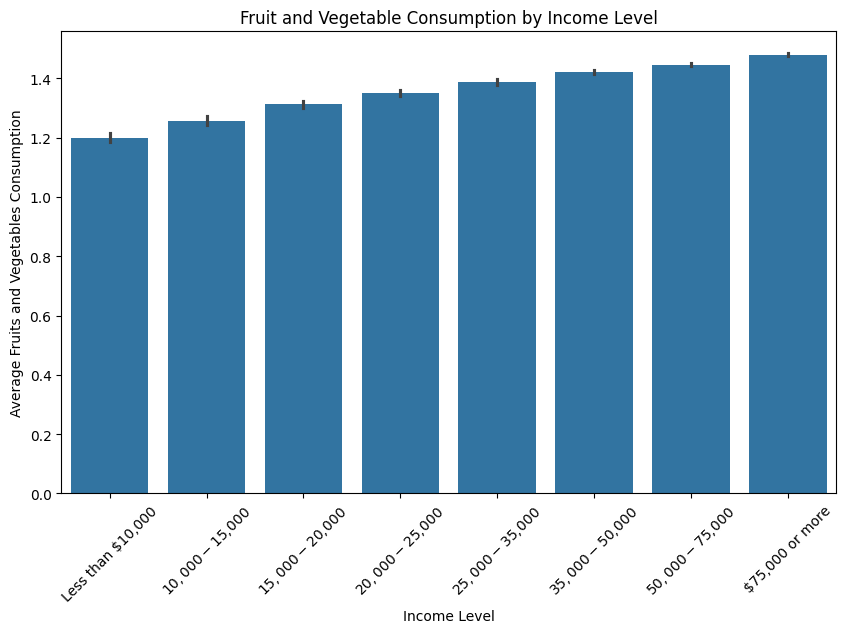

In [ ]:

# combine Fruits and Vegetables consumption into a new feature
dfCopy = df.copy()
dfCopy['FruitsVeggies'] = dfCopy['Fruits'] + dfCopy['Veggies']

# map income for clarity
income_mapping = {
    1: 'Less than $10,000',
    2: '$10,000 - $15,000',
    3: '$15,000 - $20,000',
    4: '$20,000 - $25,000',
    5: '$25,000 - $35,000',
    6: '$35,000 - $50,000',
    7: '$50,000 - $75,000',
    8: '$75,000 or more'
}
dfCopy['Income'] = dfCopy['Income'].map(income_mapping)

# order income from least to most
income_order = ['Less than $10,000', '$10,000 - $15,000', '$15,000 - $20,000',
                '$20,000 - $25,000', '$25,000 - $35,000', '$35,000 - $50,000',
                '$50,000 - $75,000', '$75,000 or more']

# bar plot showing average fruit and vegetable consumption by income level
plt.figure(figsize=(10, 6))
sns.barplot(x='Income', y='FruitsVeggies', data=dfCopy, order=income_order)

# add labels and title
plt.title('Fruit and Vegetable Consumption by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Average Fruits and Vegetables Consumption')

plt.xticks(rotation=45)

plt.show()



In the code above, we are analyzing the relationship between fruit and vegetable consumption and income levels. First, we created a new feature called **'FruitsVeggies'** by combining two existing  features, Fruits and Veggies, to reflect an individual's **total consumption of fruits and vegetables**.

As we analyze the graph, a clear correlation emerges that shows that the higher the income level, the more fruits and vegatables that are consumed. This pattern is not surprising when we consider the economic factors at play. Fruits and vegetables, whether fresh, frozen, or canned, tend to be more expensive compared to processed or less nutritious food options. This makes them less accessible to families with lower income levels.

For lower-income households, financial constraints often lead to prioritizing cheaper, calorie-dense, and highly processed foods that provide immediate satiety but are low in essential nutrients like fiber, vitamins, and minerals—nutrients that are abundant in fruits and vegetables. These processed foods, often high in sugars and unhealthy fats, contribute to weight gain, insulin resistance, and ultimately increase the risk of developing Type 2 diabetes.

When we compare the relationship between income levels and fruit and vegetable consumption with the diabetes status data that we evaluated previously, the trends become even clearer. As we saw in the earlier analysis of the diabetes-income heatmap, higher income levels are associated with a lower prevalence of diabetes, while lower income levels show a higher percentage of individuals with diabetes. This is closely tied to dietary patterns, as the bar chart on fruit and vegetable consumption highlights. Individuals with lower incomes tend to consume fewer fruits and vegetables, which are essential for maintaining healthy blood sugar levels and preventing insulin resistance which is a key factor in the development of diabetes. The data shows that as income decreases, both fruit and vegetable intake drops and diabetes becomes more prevalent, reinforcing the idea that economic barriers not only limit access to healthy foods but also contribute to higher rates of chronic conditions like diabetes.

## How strongly do Health Metrics such as Mental, Physical , Stroke, and Heart Disease correlate with Diabetes Diagnoses?
Earlier we had noticed the high outliers in mental and physical health categories, and wanted to see their correlation with a positive diabetes diagnoses

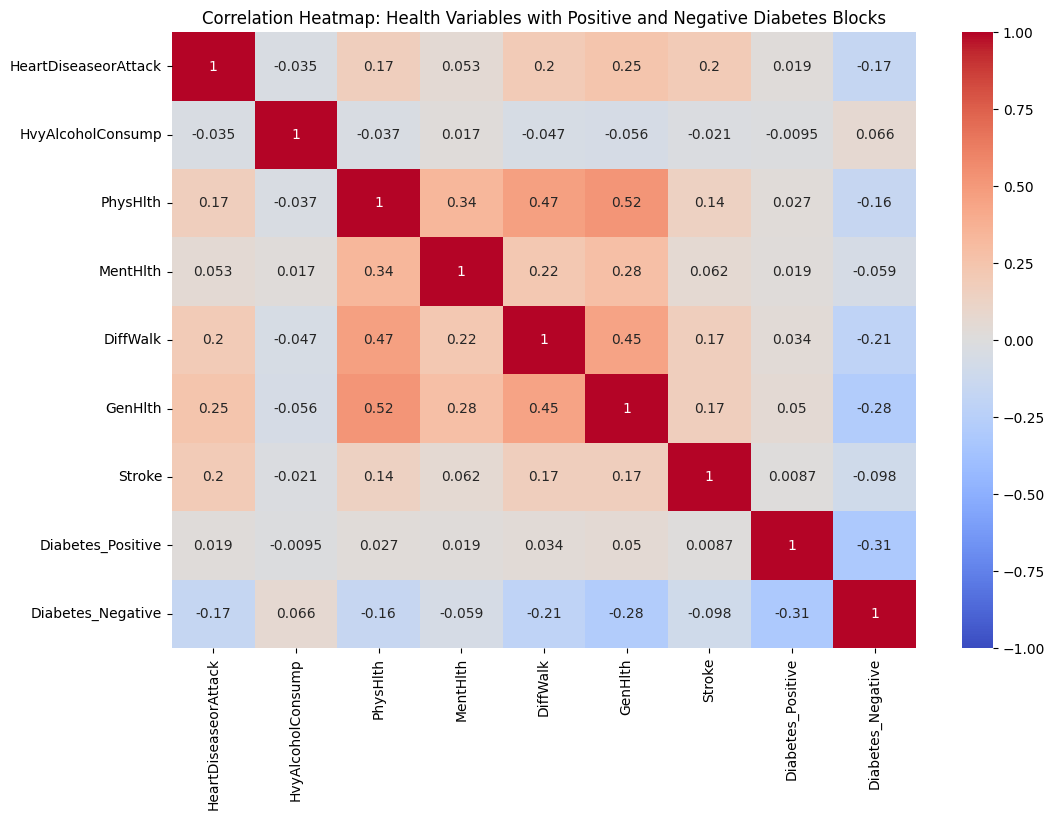

In [ ]:
# Selecting relevant health-related variables including Heart Disease, Heavy Alcohol, and other health variables
health_variables = ['HeartDiseaseorAttack', 'HvyAlcoholConsump', 'PhysHlth', 'MentHlth', 'DiffWalk', 'GenHlth', 'Stroke']

# Filter the data for these variables only, along with diabetes status
df_with_diabetes_health = df_with_diabetes[health_variables]
df_without_diabetes_health = df_without_diabetes[health_variables]

# Calculate the correlation matrices for the selected variables
corr_with_diabetes_health = df_with_diabetes_health.corr()
corr_without_diabetes_health = df_without_diabetes_health.corr()

# Creating a binary column for positive and negative diabetes diagnoses
df['Diabetes_Positive'] = df['Diabetes_012'].apply(lambda x: 1 if x == 1 else 0)
df['Diabetes_Negative'] = df['Diabetes_012'].apply(lambda x: 1 if x == 0 else 0)

# Update the health-related variables to include both positive and negative diabetes blocks
health_variables_with_diabetes_blocks = ['HeartDiseaseorAttack', 'HvyAlcoholConsump', 'PhysHlth', 'MentHlth', 'DiffWalk', 'GenHlth', 'Stroke', 'Diabetes_Positive', 'Diabetes_Negative']

# Filter the data to include all the relevant variables
df_health_with_diabetes_blocks = df[health_variables_with_diabetes_blocks]

# Compute the correlation matrix for the updated set of variables
corr_health_with_diabetes_blocks = df_health_with_diabetes_blocks.corr()

# Plot the heatmap with both diabetes-positive and diabetes-negative blocks
plt.figure(figsize=(12, 8))
sns.heatmap(corr_health_with_diabetes_blocks, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Health Variables with Positive and Negative Diabetes Blocks')
plt.show()


In the heatmap above, we can see the correlations between sevel health-related variables (heart disease, heavy alcohol consumption, physical health, mental health, difficulty walking, general health, and stroke) and diabetes status. By showing the relationships between many health variables and diabetes status, we are able to better understand the relationship between them all. Lets evaluate some of these relationships.

First, lets look at the **Diabetes** and **Heart Disease** relationship which has one of the strongest correlations. This aligns well with the established and well known medical knowledge that individuals with diabetes are at a higher risk of developing cardiovascular diseases which includes heart diease. People with **Diabetes** are also more prone to **Strokes** as we can see on the map. Generally, people with Heart Disease are also likely to have strokes as shown by their relationship on the heatmap. This relationship is supported by the correlation between **Diabetes** and **General Health**, because many Diabetics report having a lower general health which leads to a higher risk of Heart Disease.

Next, lets look at the relationship between **Diabetes** and **Physical Health**. This relationship shows a very low correlation, meaning that people who have diabetes report having worse physical health. Diabetes is often associated with fatigue and overall diminished physical well-being. This correlation is supported by the relationship between **Diabetes** and **Difficulty Walking** as many Diabetics have mobility issues.

Finally, lets look at two of the weaker correlations which are **Diabetes** relationships with **Mental Health** and **Heavy Alcohol Consumption**. People with Diabetes have a slightly stronger relationship with Mental Health then people without Diabetes. This could be because of the stress that comes with facing the disease-related psychological challenges. Heavy Alcohol Consumption can often be associated with a poor general health (as we analyzed earlier), which we saw has a stronger correlation with Diabetes.

The correlation heatmap visually demonstrates the close links between diabetes status and a range of health variables. It highlights the need for comprehensive healthcare strategies that address the complex interplay of physical, mental, and lifestyle factors in the prevention and management of diabetes.



## EXTRA QUESTION:
To what extent is BMI correlated with diabetes and how do the categories differ?

<ipython-input-21-5541807135cb>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diabetes_vs_bmi = df.groupby(['BMI_Range', 'Diabetes_012']).size().unstack()


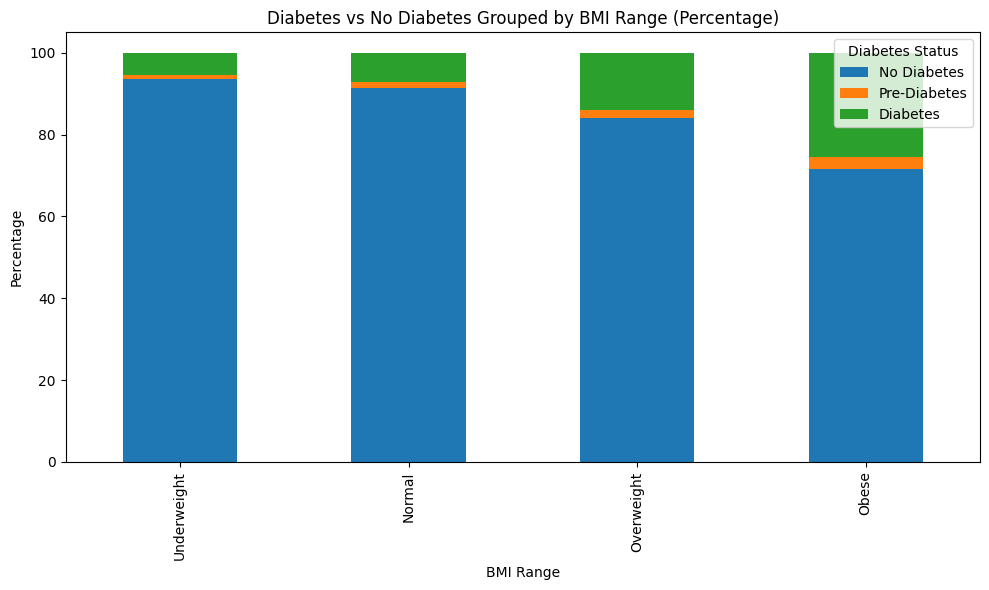

In [ ]:
# Create BMI range categories
df['BMI_Range'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 60], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Group by BMI range and diabetes status
diabetes_vs_bmi = df.groupby(['BMI_Range', 'Diabetes_012']).size().unstack()

# Convert counts to percentages for each BMI range
diabetes_vs_bmi_percentage = diabetes_vs_bmi.div(diabetes_vs_bmi.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart based on percentages
diabetes_vs_bmi_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Diabetes vs No Diabetes Grouped by BMI Range (Percentage)')
plt.xlabel('BMI Range')
plt.ylabel('Percentage')
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Pre-Diabetes', 'Diabetes'])
plt.tight_layout()
plt.show()

This visualization that maps the relationship between BMI and Diabetes Status shows a strong relationship between the two factors for developing diabetes. As the BMI increases, specifically from overweight to obese, we see a substantial rise in the percentage of diabetics. To further understand the relationship between BMI and Diabetes Status, lets investigate each BMI range.

Starting with the **Underweight** and **Normal** BMI group, we see that the majority of indiviuals at these BMI ranges fall into the No Diabetes group. This informs us that having a healthy BMI substantially prevents one from becoming Pre-Diabetic and Diabetic. The small percentage of individuals in the Underweight and Normal BMI group who are Pre-Diabetic or Diabetic can be explained by having poor diet habit, lack of physical activity, or genetic factors.

Moving on to the **Overweight** BMI group, we see a substantially greater proportion of people move into the Pre-Diabetic and Diabetic category. Still, many people in the group are still in the No Diabetes category, alluding that this BMI category can be a "tipping point" for entering the Pre-Diabetic and Diabetic category. Lifestyle changes such as weight loss, improved diet habits, and an increase in physical activity could potentially aid individuals within this Overweight group to prevent entering into the Pre-Diabetic and Diabetic category.

Finally, lets examine the **Obese** BMI grouping. Once individuals enter this grouping, the proportion of individuals in the Pre-Diabetic and Diabetic categories becomes substantial.

In summary, the visualization provides a clear representation of the strong correlation between increasing BMI and the risk of developing diabetes.

#Conclusion


In conclusion, our dataset provided an in-depth look at an indivial's lifestyle to classify them in one of three categories: "no diabetes", "prediabetes", or "diabetes". By cleaning and filtering the data, we were able to identify how key features, such as personal information, demographics, and health history, were related to a diabetes diagnosis. One of our primary areas of interest was the correlation between diabetes and income status. We found that the high cost of fruits and vegetables may contribute to the increased prevalence of diabetes among lower-income individuals. The lack of access to helathy foods directly impacts overall health, explaining the higher rate of diabetes. Additionally, we explored how other health conditions, such as mobility issues and heart disease, were associated with diabetes. It became clear that a strong, healthy lifestyle was linked to a reduced risk of diabetes, highlightening the importance of physical activity and self-care. Finally, we concluded that a higher BMI was also related to an increased risk of diabetes. Overall, this data analysis was a meaningful way to discover how lifestyle factors and food acessibility play an important part of diabetes prevention.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!jupyter nbconvert --to html /content/lab1_diabetes_diagnosis.ipynb

Mounted at /content/drive
[NbConvertApp] Converting notebook /content/lab1_diabetes_diagnosis.ipynb to html
[NbConvertApp] Writing 1503308 bytes to /content/lab1_diabetes_diagnosis.html
